In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ece-143-group-5/final_combined_dataset_v2.csv
/kaggle/input/ece-143-group-5/final_combined_data.csv
/kaggle/input/ece-143-group-5/vehicle_stops_2014_datasd.csv
/kaggle/input/ece-143-group-5/vehicle_stops_search_details_2015_datasd.csv
/kaggle/input/ece-143-group-5/final_combined_dataset_v3.csv
/kaggle/input/ece-143-group-5/vehicle_stops_search_details_2016_datasd.csv
/kaggle/input/ece-143-group-5/vehicle_stops_2015_datasd.csv
/kaggle/input/ece-143-group-5/vehicle_stops_2017_datasd.csv
/kaggle/input/ece-143-group-5/vehicle_stops_race_codes.csv
/kaggle/input/ece-143-group-5/vehicle_stops_2016_datasd.csv
/kaggle/input/ece-143-group-5/vehicle_stops_dictionary.csv
/kaggle/input/ece-143-group-5/vehicle_stops_search_details_2014_datasd.csv
/kaggle/input/ece-143-group-5/vehicle_stops_search_details_2017_datasd.csv
/kaggle/input/ece-143-group-5/vehicle_stops_final_datasd.csv
/kaggle/input/ece-143-group-5/pd_beats_datasd/pd_beats_datasd.dbf
/kaggle/input/ece-143-group-5/pd_beats_da

In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv("/kaggle/input/ece-143-group-5/final_combined_dataset_v3.csv")

In [109]:
drop_cols = ['stop_id', 'search_details_id']
df = df.drop(columns = drop_cols)
df

,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,sd_resident,arrested,searched,search_details_type,search_details_description
0,0,830,1,0.0,21,03-01-2014,00:00,1,0,0,0,Citation
1,0,830,1,0.0,21,03-01-2014,00:00,1,0,0,0,Other
2,0,830,1,0.0,21,03-01-2014,00:00,1,0,0,1,VERBAL NOTICE
3,1,610,1,1.0,27,04-01-2014,00:00,0,0,0,0,Citation
4,0,810,6,1.0,19,05-01-2014,00:00,1,0,0,0,Citation
...,...,...,...,...,...,...,...,...,...,...,...,...
430471,1,110,16,1.0,31,12-01-2016,07:05,1,0,0,0,Citation
430472,1,710,16,0.0,49,24-02-2016,08:42,1,0,0,0,Citation
430473,1,520,11,1.0,51,07-10-2015,09:00,1,0,0,0,Written Warning
430474,1,310,16,1.0,22,07-11-2017,09:15,0,0,0,0,Citation


In [110]:
df['search_details_description'].unique()

array(['Citation', 'Other', 'VERBAL NOTICE', ...,
       'Other, SEARCH VEHICLE FOR IDENTIFICATION', 'ERROR ON THE STOP',
       'NEW VEH, NO PLATE'], dtype=object)

# Exploratory Data Analysis

# Plot-1 : Finding Important Features

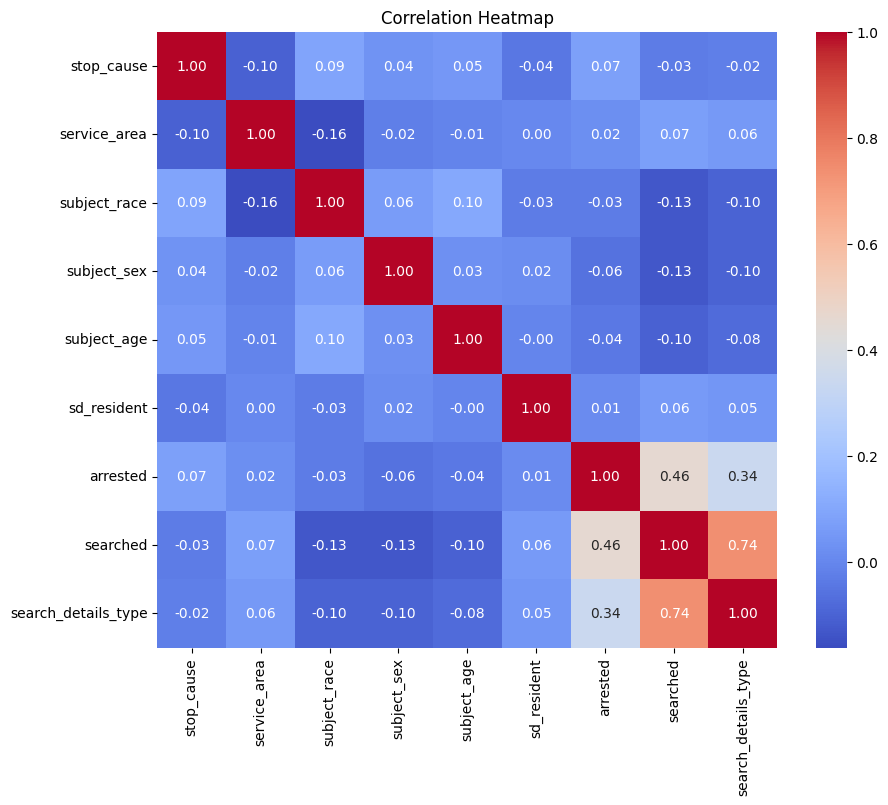

In [111]:
# Selecting relevant numerical columns for correlation heatmap
numerical_columns = df.select_dtypes(include=['number']).columns

# Creating a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Plot-2 : Distribution of Stops Across Service Areas

In [112]:
service_area_counts = df['service_area'].value_counts()

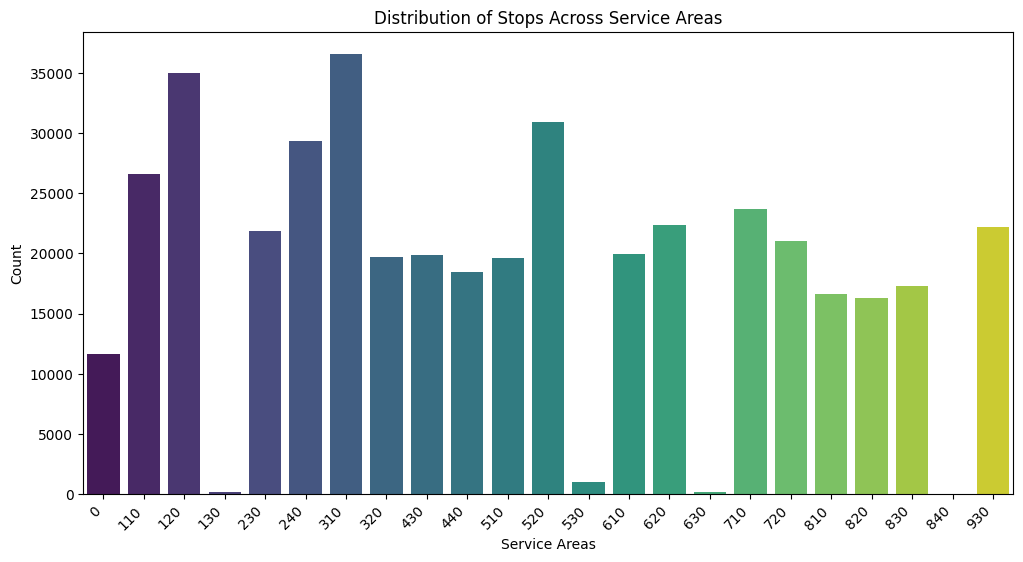

In [113]:
# Plot the distribution of stops across service areas
plt.figure(figsize=(12, 6))
sns.barplot(x=service_area_counts.index, y=service_area_counts.values, palette="viridis")
plt.title('Distribution of Stops Across Service Areas')
plt.xlabel('Service Areas')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# PLot-3 : Top Service Areas with the most stops

In [114]:
# Identify service areas where stops are more frequent
top_service_areas = service_area_counts.head(10)  # Adjust the number of top service areas as needed

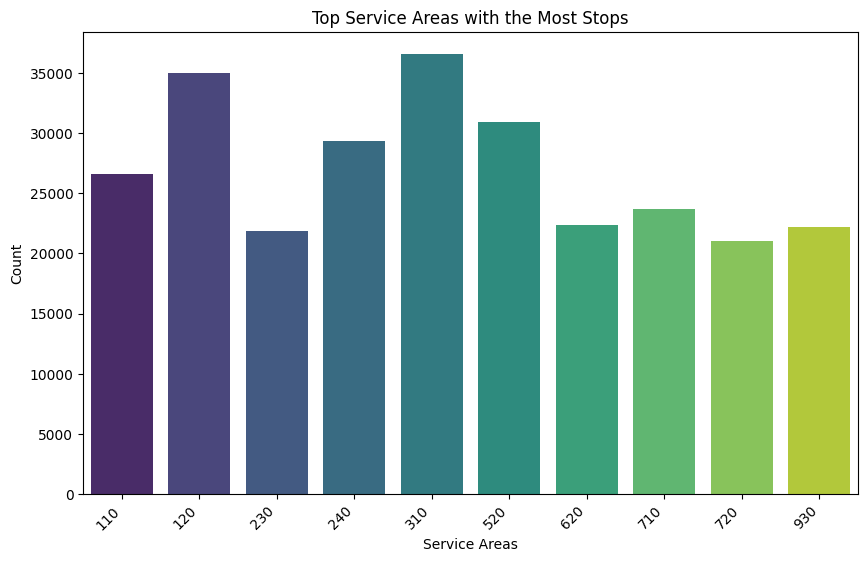

In [115]:
# Plot the top service areas
plt.figure(figsize=(10, 6))
sns.barplot(x=top_service_areas.index, y=top_service_areas.values, palette="viridis")
plt.title('Top Service Areas with the Most Stops')
plt.xlabel('Service Areas')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot-4 : Subject Races vs Number of Stops 

In [116]:
subject_race_mapping_switched = {
    0: 'Other Asian',
    1: 'Black',
    2: 'Chinese',
    3: 'Cambodian',
    4: 'Filipino',
    5: 'Guamanian',
    6: 'Hispanic',
    7: 'Indian',
    8: 'Japanese',
    9: 'Korean',
    10: 'Laotian',
    11: 'Other',
    11: 'Pacific Islander',
    12: 'Samoan',
    14: 'Hawaiian',
    15: 'Viet',
    16: 'White',
    17: 'Unknown',
    18: 'Asian indian'
}

# Map the values in the 'search_details_type' column
df['subject_race'] = df['subject_race'].map(subject_race_mapping_switched)

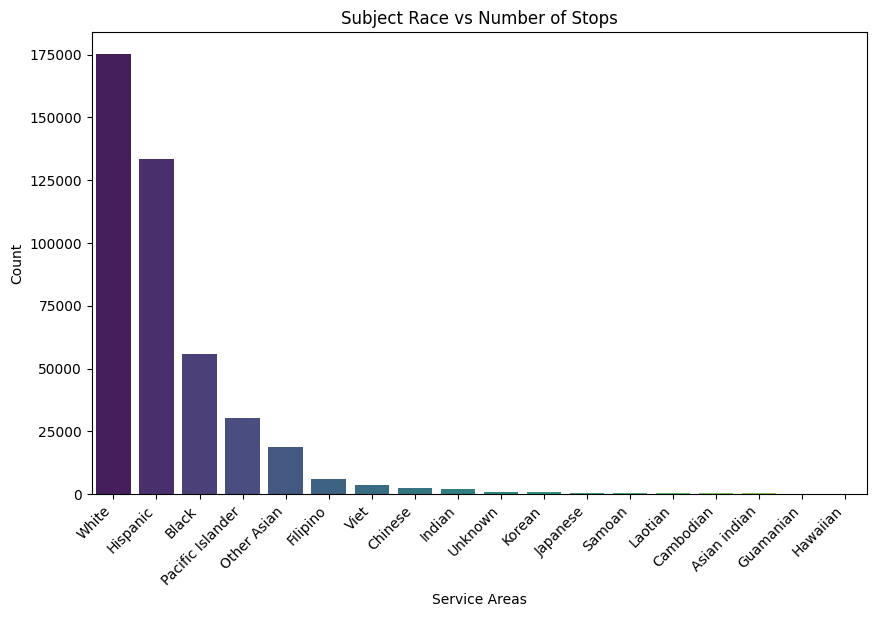

In [117]:
subject_race_counts = df['subject_race'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=subject_race_counts.index, y=subject_race_counts.values, palette="viridis")
plt.title('Subject Race vs Number of Stops')
plt.xlabel('Service Areas')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# PLot-5: Gender Vs Pullovers

In [118]:
sex_map={
    0:'MALE',
    1: 'FEMALE',
    2: 'UNKNOWN'
}

df['subject_sex'] = df['subject_sex'].map(sex_map)

subject_sex_counts = df['subject_sex'].value_counts()

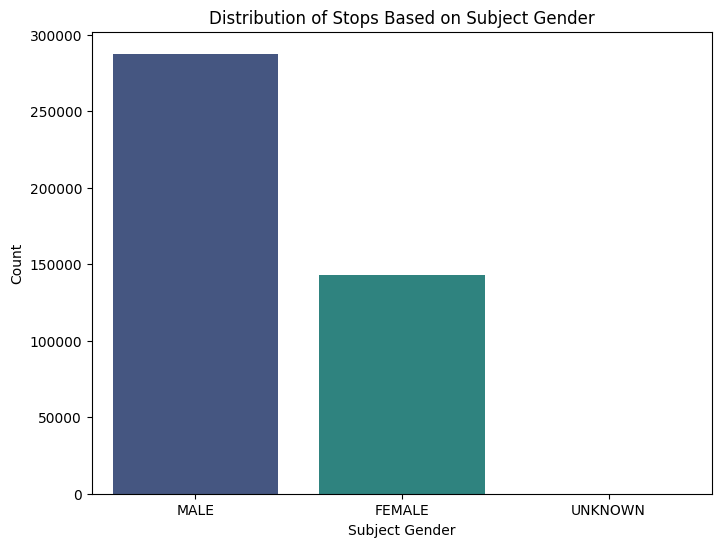

In [119]:
# Visualize the distribution of stops based on subject gender
plt.figure(figsize=(8, 6))
sns.countplot(x='subject_sex', data=df, palette='viridis')
plt.title('Distribution of Stops Based on Subject Gender')
plt.xlabel('Subject Gender')
plt.ylabel('Count')
plt.show()

# Plot-6 Age bins vs number of pull-overs

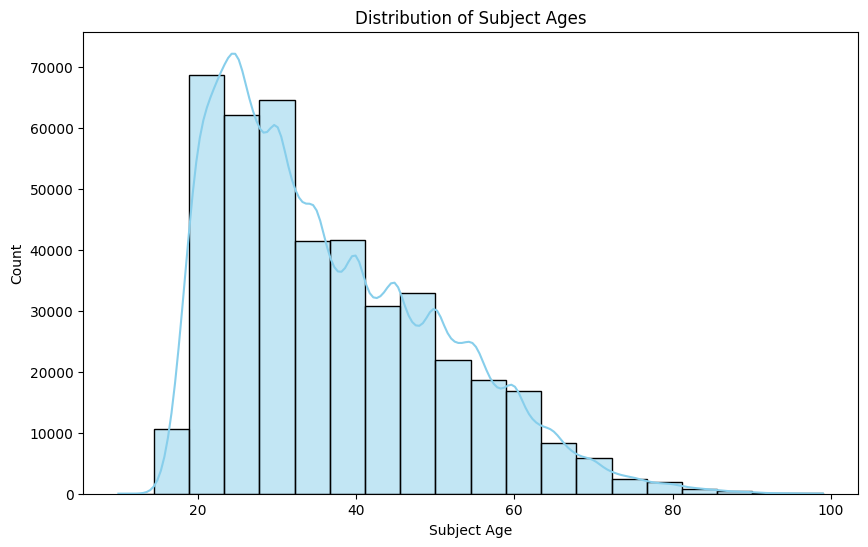

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(df['subject_age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Subject Ages')
plt.xlabel('Subject Age')
plt.ylabel('Count')
plt.show()

# PLot-7 : Age vs Number of pull-overs

In [121]:
# Create age bins
age_bins = [0, 18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']
df['age_group'] = pd.cut(df['subject_age'], bins=age_bins, labels=age_labels, right=False)

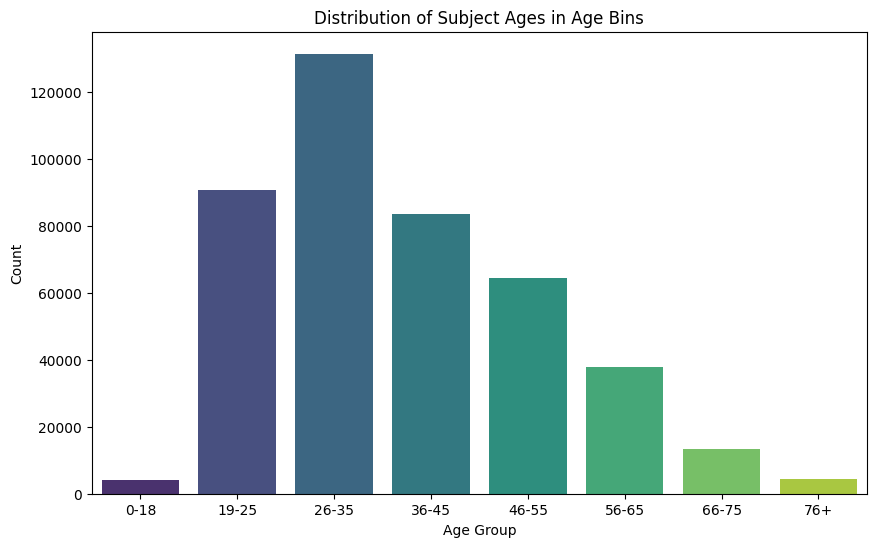

In [122]:
# Visualize the distribution of subject ages using age bins
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=df, palette='viridis')
plt.title('Distribution of Subject Ages in Age Bins')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Temporal Analysis

# Plot-8 : Number of stops over the years

In [123]:
from datetime import datetime
import matplotlib.pyplot as plt

In [124]:
df
# Split the 'time_stop' column into 'hour' and 'minute' columns
df[['hour', 'minute']] = df['time_stop'].str.split(':', expand=True)

# Convert the 'hour' and 'minute' columns to numeric type if needed
df[['hour', 'minute']] = df[['hour', 'minute']].apply(pd.to_numeric)


In [125]:
df['date_stop'] = pd.to_datetime(df['date_stop'], format='%d-%m-%Y')

# Extract year, month, and day into separate columns
df['year_stop'] = df['date_stop'].dt.year
df['month_stop'] = df['date_stop'].dt.month
df['day_stop'] = df['date_stop'].dt.day

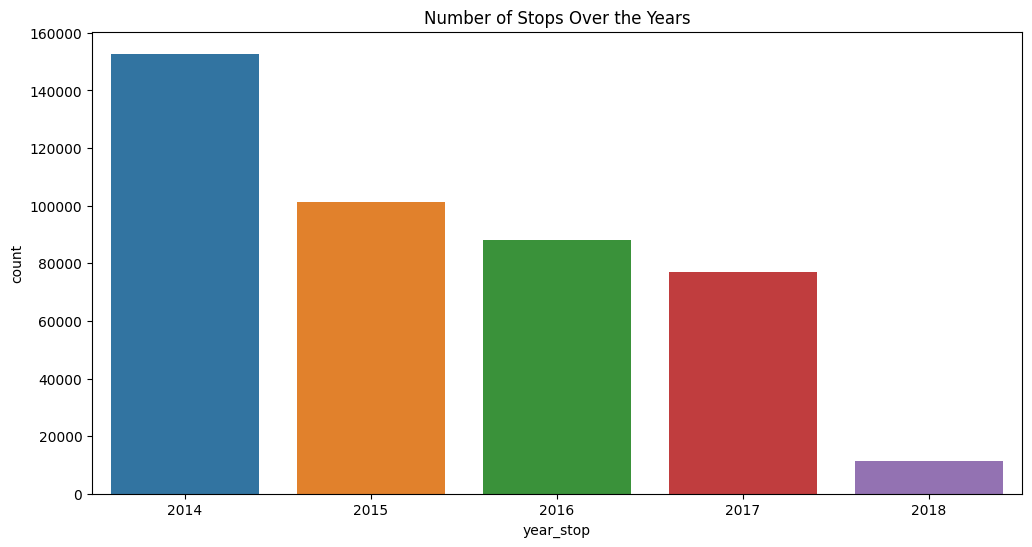

In [126]:
# Plotting the number of stops over time
plt.figure(figsize=(12, 6))
sns.countplot(x='year_stop', data=df)
plt.title('Number of Stops Over the Years')
plt.show()

# PLot-9: line plot of months vs pull - overs

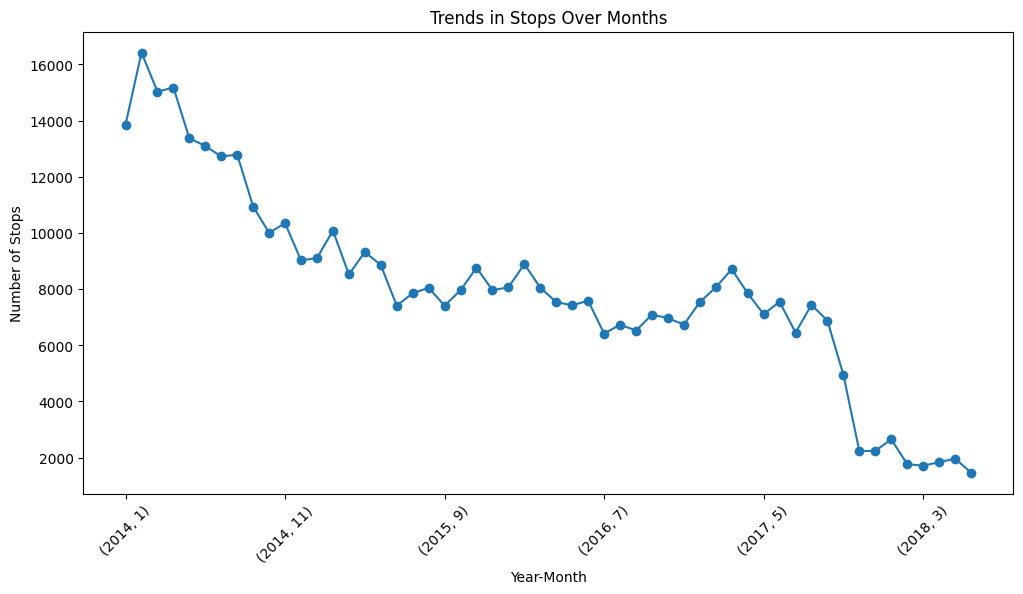

In [127]:
# Trends in stops over months
monthly_stops = df.groupby(['year_stop', 'month_stop']).size()

plt.figure(figsize=(12, 6))
monthly_stops.plot(marker='o')
plt.title('Trends in Stops Over Months')
plt.xlabel('Year-Month')
plt.ylabel('Number of Stops')
plt.xticks(rotation=45)
plt.show()

# Plot-10 : Number of Stops over Months.

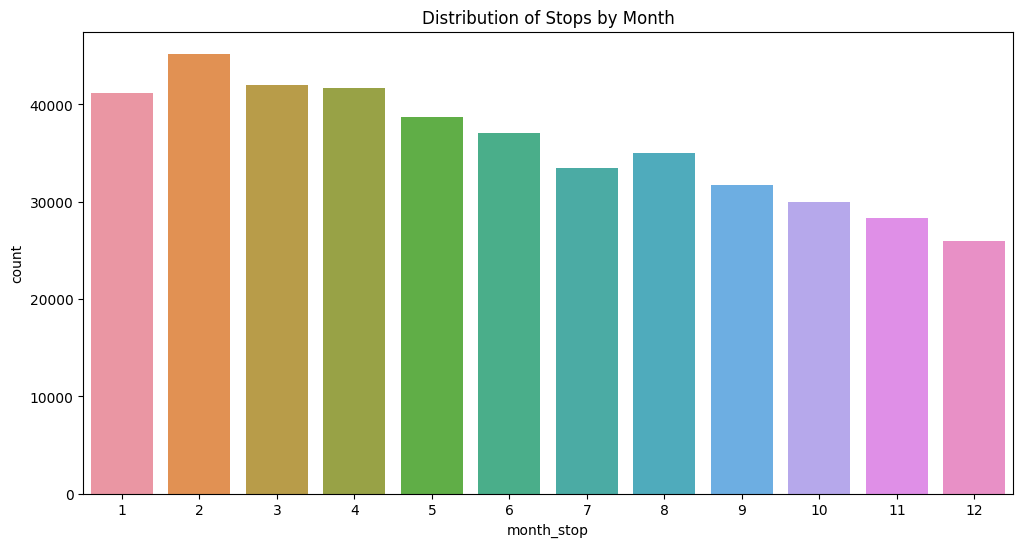

In [128]:
# Plotting the distribution of stops by month
plt.figure(figsize=(12, 6))
sns.countplot(x='month_stop', data=df)
plt.title('Distribution of Stops by Month')

# Adding a trendline using regplot
#sns.regplot(x=df['month_stop'].value_counts().index, y=df['month_stop'].value_counts().values, scatter=False)

plt.show()

# Plot-11 Heat map of month vs pull-over

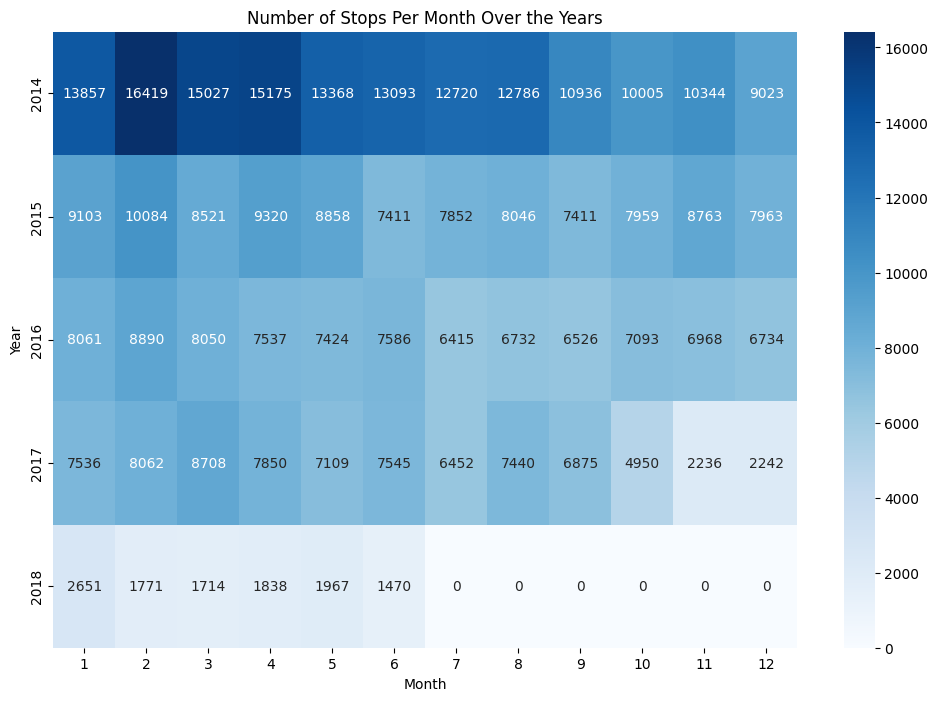

In [129]:
# Temporal analysis by month
monthly_counts = df.groupby(['year_stop', 'month_stop']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_counts, cmap='Blues', annot=True, fmt='d')
plt.title('Number of Stops Per Month Over the Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# PLot-12: Stops per day of week

In [130]:
df['date_stop'] = pd.to_datetime(df['date_stop'])  # Convert 'date_stop' to datetime format
df['day_of_week'] = df['date_stop'].dt.day_name()  # Extract day name and create a new column

# If you want to have the abbreviated day names (e.g., Mon, Tue), you can use:
df['day_of_week'] = df['date_stop'].dt.strftime('%a')
np.unique(df['day_of_week'])

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype=object)

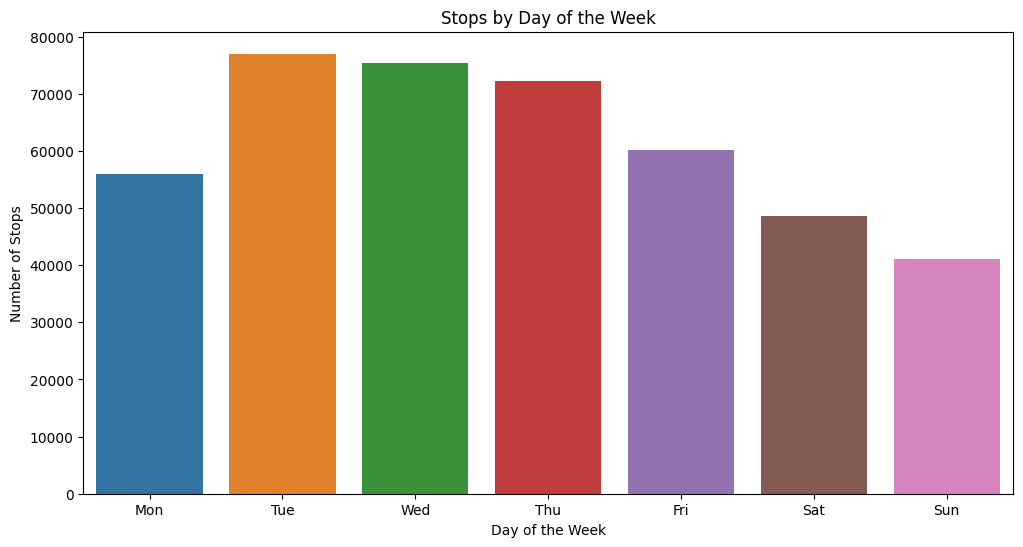

In [131]:
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Stops by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Stops')
plt.show()

# Plot -13: Violin plot of Hours distrubution

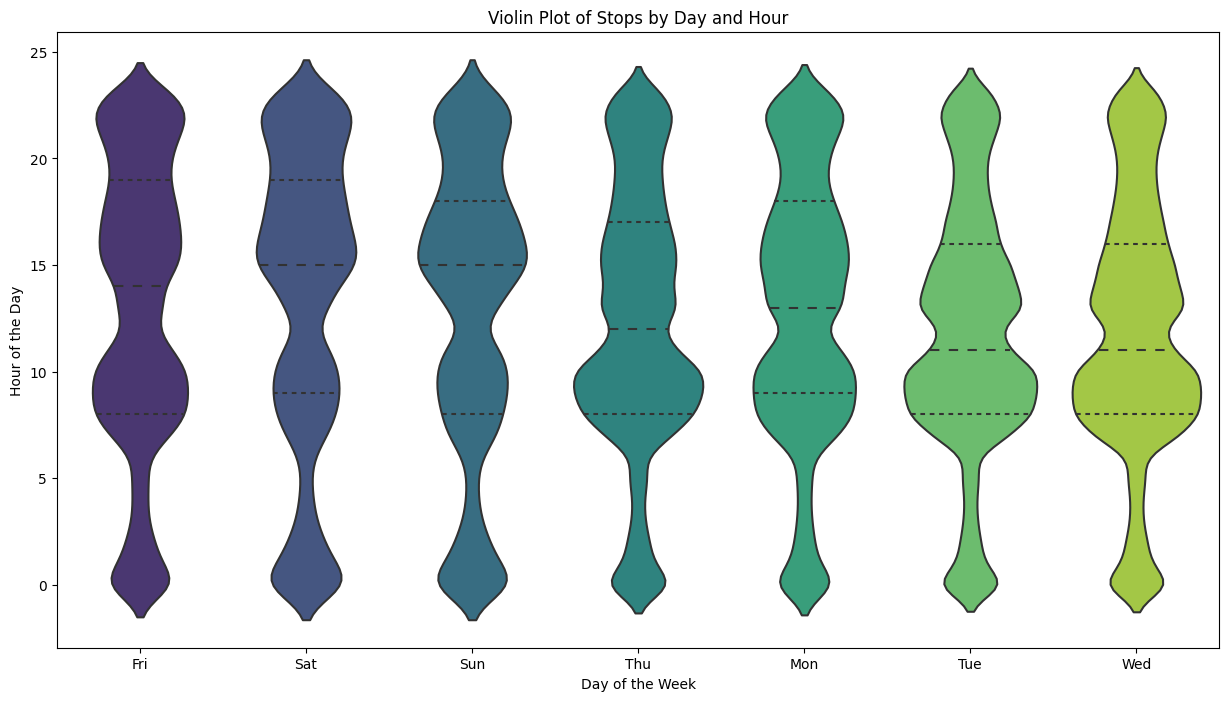

In [132]:
# Violin plot of stops by day and hour
plt.figure(figsize=(15, 8))
sns.violinplot(x='day_of_week', y='hour', data=df, inner='quartile', palette='viridis')
plt.title('Violin Plot of Stops by Day and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

# Plot-14 : Hourly distribution of Stops

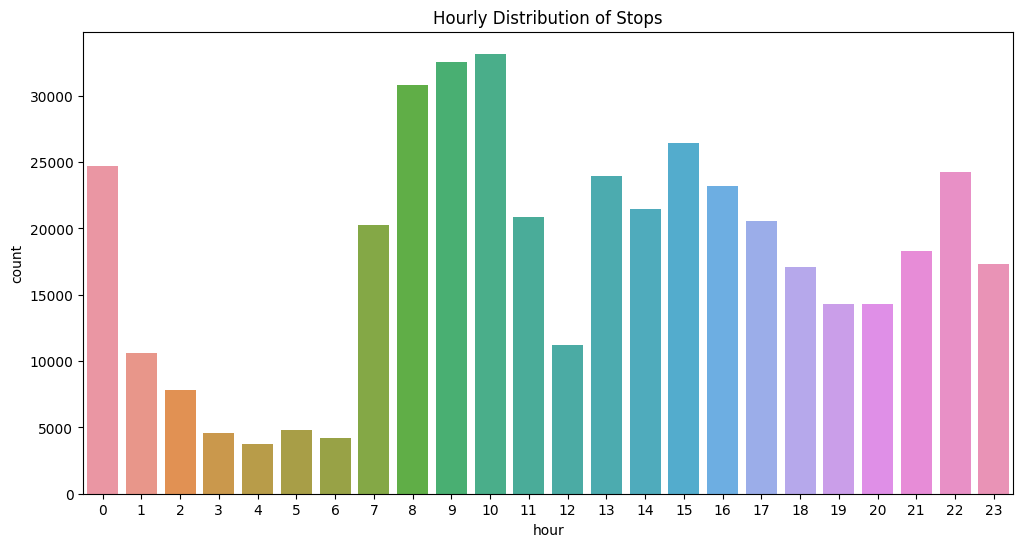

In [133]:
# Plotting the hourly distribution of stops
# Assuming 'hour' is a column in your DataFrame 'df'
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df)
plt.title('Hourly Distribution of Stops')

# Adding a trendline using regplot
#sns.regplot(x=df['hour'].value_counts().index, y=df['hour'].value_counts().values, scatter=False, color='red')

plt.show()

# Plot-15 : Heatmap of hourly distribution

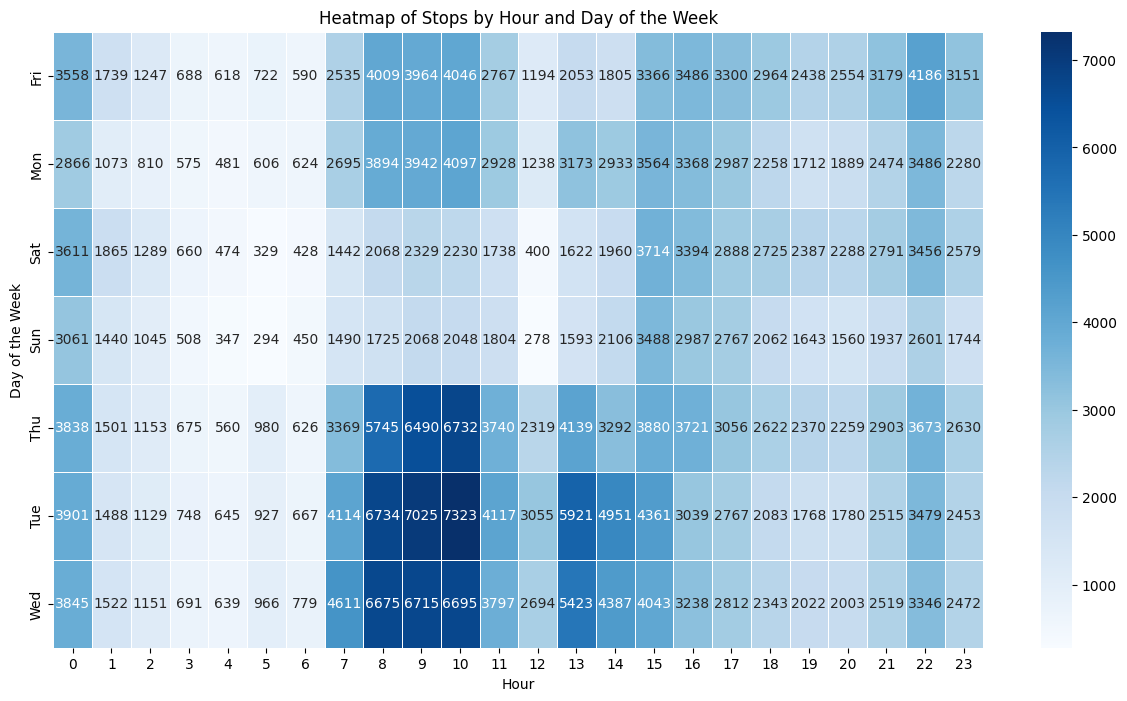

In [134]:
# Heatmap of stops by hour and day
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack()

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Stops by Hour and Day of the Week')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.show()

# Geospatial Analysis

# Plot-17: Stop vs divisions in SD

In [135]:
import matplotlib.pyplot as plt
import geopandas

In [136]:
df_divisions = geopandas.read_file("/kaggle/input/ece-143-group-5/pd_divisions_datasd")
df_beats = geopandas.read_file("/kaggle/input/ece-143-group-5/pd_beats_datasd")
df_stops = pd.read_csv('/kaggle/input/ece-143-group-5/final_combined_dataset_v3.csv')

In [137]:
def construct_beats(input_beats):
    '''
    Construct the dataframe for beats.
    This function uses global dfs.
    
    :param input_beats: beats dataframe.
    :type input_beats: pandas dataframe.
    :returns: pandas dataframe
    '''
    
    #Construct the dataframe for beats. This is used to merge and get the divisions.
    beats_dataframe = input_beats[['serv', 'div']]
    beats_dataframe = beats_dataframe.groupby('serv').first()
    beats_dataframe = beats_dataframe[['div']]
    
    #clean the indices and datatypes
    beats_dataframe = beats_dataframe.reset_index()
    beats_dataframe['serv'] = beats_dataframe['serv'].astype(int)
    
    return beats_dataframe

def divsums(count, beats, divisions):
    '''
    This function returns the geopandas dataframe which has both geometric specifications from beats and count per location obtained from count.
    
    :type count: pandas dataframe.
    :param count: pandas dataframe, which contains the data which is used to corelate with beats.
    :type beats: pandas dataframe.
    :param beats: location dataframe.
    :type divisions: geopandas dataframe
    :param divisions: filename for source text 
    :returns: geopandas dataframe
    '''
    # clean the count dataframe
    count_clean = count.reset_index()
    count_clean['service_area'] = count_clean['service_area'].astype(int)
   
    # Joining the count to the beats dataframe
    count_wrt_serv = beats.join(count_clean.set_index('service_area'), on='serv').dropna()
    count_wrt_serv[['arrested']] = count_wrt_serv[['arrested']].fillna(0)
    
    # Joining the above dataframe with division dataframe
    count_wrt_serv = count_wrt_serv.groupby('div').sum()['arrested']
    return divisions.join(count_wrt_serv, on='div_num')

def plot_map(input_geopandasdf, title_plot):
    '''
    This function plots the geopandas dataframe. This dataframe contains information of count per division in geopandas dataframe.
    
    :type input_geopandasdf: geopandas dataframe
    :param input_geopandasdf: geopandas dataframee containing count inforamtion per division and geographical specifications of the division.
    :type title_plot: string
    :param title_plot: title for the plot.
    '''
    ax = input_geopandasdf.plot(column='arrested', figsize=(25, 10), edgecolor='k',cmap='Blues', legend=True)
    input_geopandasdf.apply(lambda x: ax.annotate(text=x.div_name.capitalize(), xy=x.geometry.centroid.coords[0], color = 'black', ha='center'),axis=1)
    plt.title(title_plot)
    ax.set_axis_off()
    

def stop_data_for_plotting(stops, beats, divisions):
    '''
    This function cleans the dataframe data. returns a geopandas dataframe for stop count which can be plotted.
    
    :type stops: pandas dataframe.
    :param stops: filename for source text.
    :param input_beats: beats dataframe.
    :type input_beats: pandas dataframe.
    :type divisions: geopandas dataframe
    :param divisions: filename for source text 
    :returns: geopandas dataframe for stop count which can be plotted. 
    '''
    # Cleanup data
    df_stops_serive_area = stops[['service_area', 'arrested']]
    
    # Build counts
    # Amount of stops per service area
    stop_count = df_stops_serive_area.groupby('service_area').count()
    # Build beats
    beats_dataframe = construct_beats(beats)
    
    # Build divsums
    divsums_stop_dataframe = divsums(stop_count, beats_dataframe, divisions)
    return divsums_stop_dataframe



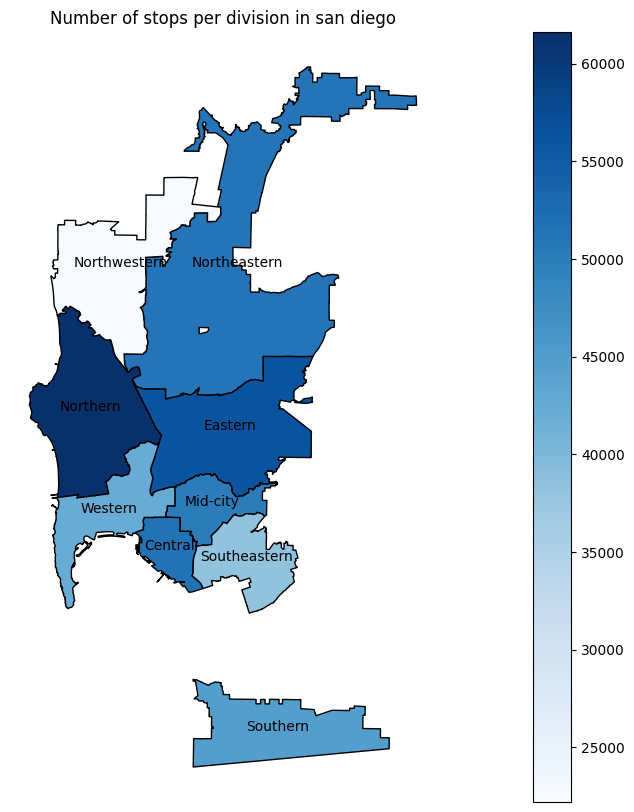

In [138]:
stop_data_div = stop_data_for_plotting(df_stops, df_beats, df_divisions)
title_plot = 'Number of stops per division in san diego'
plot_map(stop_data_div, title_plot)

# Plot-18: Arrest vs divisions in SD

In [139]:
def arrest_data_for_plotting(stops, beats, divisions):
    '''
    This function cleans the dataframe data. returns a geopandas dataframe for arrest count which can be plotted.
    
    :type stops: pandas dataframe.
    :param stops: filename for source text.
    :param input_beats: beats dataframe.
    :type input_beats: pandas dataframe.
    :type divisions: geopandas dataframe
    :param divisions: filename for source text 
    :returns: geopandas dataframe for arrest count which can be plotted. 
    '''
    # Cleanup data
    df_stops_serive_area = stops[['service_area', 'arrested']]
    
    # Build counts
    # Amount of stops per service area
    stop_count = df_stops_serive_area.groupby('service_area').count()
    
    arrested_final_count = df_stops_serive_area.loc[df_stops_serive_area['arrested'] == 1].groupby('service_area').count()
    probability_of_arrest = (arrested_final_count/stop_count).fillna(0)
  
    # Build beats
    beats_dataframe = construct_beats(beats)
    
    # Build divsums
    divsums_arrest_dataframe = divsums(probability_of_arrest, beats_dataframe, divisions)
    return divsums_arrest_dataframe

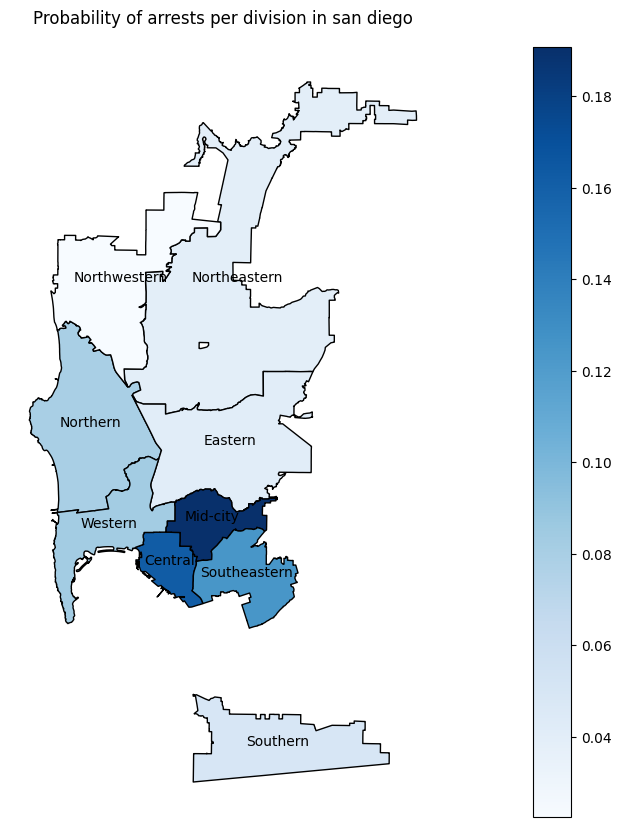

In [140]:
arrest_data_div = arrest_data_for_plotting(df_stops, df_beats, df_divisions)
title_plot = 'Probability of arrests per division in san diego'
plot_map(arrest_data_div, title_plot)

# Demographics Analysis

# PLot-19: Age VS PDF of stops of one race

In [141]:
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
data_2014 = pd.read_csv('/kaggle/input/ece-143-group-5/vehicle_stops_2014_datasd.csv')
data_2015 = pd.read_csv('/kaggle/input/ece-143-group-5/vehicle_stops_2015_datasd.csv')
data_2016 = pd.read_csv('/kaggle/input/ece-143-group-5/vehicle_stops_2016_datasd.csv')
data_2017 = pd.read_csv('/kaggle/input/ece-143-group-5/vehicle_stops_2017_datasd.csv')
data_combined = pd.read_csv('/kaggle/input/ece-143-group-5/final_combined_dataset_v2.csv')

In [143]:
### Creating a race_dictionary
race_csv = pd.read_csv('/kaggle/input/ece-143-group-5/vehicle_stops_race_codes.csv')
race_dict = collections.defaultdict(str)

for i in range(len(race_csv)):
    race_dict[race_csv['Race Code'][i]] = race_csv['Description'][i]

In [144]:
data_combined['stop_cause'].value_counts()

stop_cause
Moving Violation                      306175
Equipment Violation                   122452
Radio Call/Citizen Contact              2902
Muni, County, H&S Code                  1971
Personal Knowledge/Informant            1586
Suspect Info (I.S., Bulletin, Log)      1163
No Cause Specified on a Card             544
Personal Observ/Knowledge                259
UNI, &County, H&&S Code                   80
&Moving Violation                         68
Suspect Info                              49
MUNI, County, H&S Code                    45
Other                                     32
&Equipment Violation                      10
not marked                                 5
none listed                                5
NOT SPECIFIED                              2
not marked  not marked                     2
NOT MARKED                                 2
&Radio Call/Citizen Contact                2
not noted                                  2
not listed                                 1

In [145]:
race_list = list(data_combined['subject_race'].value_counts())
data_combined[data_combined['subject_race'] == 'U']['subject_age']
l = [str(i) for i in range(1,121)]
remove = []
for i in range(len(data_combined)):
    
    if data_combined.iloc[i]['subject_age'] not in l:
        remove.append(i)
    
data_combined=data_combined.drop(remove)

In [146]:
data_combined['subject_age'] = data_combined['subject_age'].astype(int)

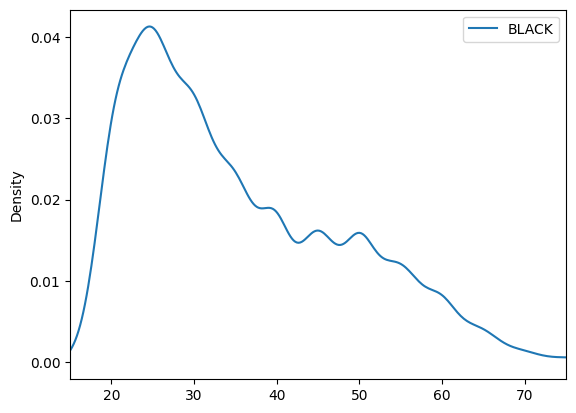

In [147]:
race_limited = ['B']
fig, ax = plt.subplots()
ax.set_xlim(15, 75)

for race in data_combined['subject_race'].unique():
    if race not in race_limited:
        continue
    s = data_combined[data_combined['subject_race'] ==race]['subject_age']
    s.plot.kde(ax=ax, label=race_dict[race])
ax.legend()

# PLot-20: Age VS PDF of stops

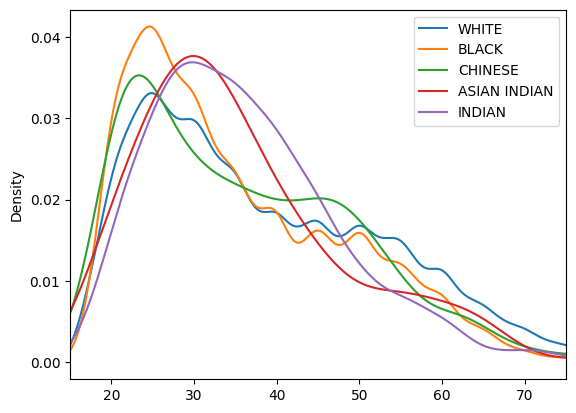

In [148]:
race_limited = ['B','C','I','W','Z']
fig, ax = plt.subplots()
ax.set_xlim(15, 75)

for race in data_combined['subject_race'].unique():
    if race not in race_limited:
        continue
    s = data_combined[data_combined['subject_race'] ==race]['subject_age']
    s.plot.kde(ax=ax, label=race_dict[race])
ax.legend()
#print(s) 